In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
from sympy.polys.numberfields.modules import to_col
%matplotlib inline

Понимание что такое производные

In [2]:
def f(x):
    # 6x - 4
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
np.array(10)

array(10)

In [5]:
xs = np.arange(-5, 5, 0.5)
xs

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [6]:
ys = f(xs)
ys

array([100.  ,  83.75,  69.  ,  55.75,  44.  ,  33.75,  25.  ,  17.75,
        12.  ,   7.75,   5.  ,   3.75,   4.  ,   5.75,   9.  ,  13.75,
        20.  ,  27.75,  37.  ,  47.75])

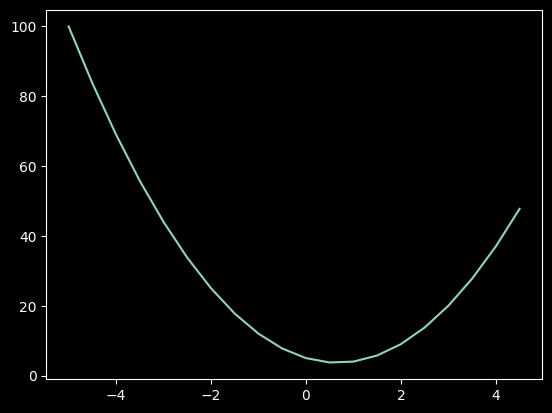

In [7]:
plt.plot(xs, ys)

Производная функция в точке - уровнение прямой описывающей касательную в этой точке. Описывается насколько изменится целевая функция при бесконечно малом изменении входящей в нее переменной (slope)

In [8]:
h = 0.0001
x = 3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

20.0
20.001400030000006
14.000300000063248


In [9]:
h = 0.0001
x = -3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

44.0
43.99780002999999
-21.999700000066014


In [10]:
h = 0.0001
x = 2/3
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

3.666666666666667
3.666666696666667
0.0002999999981767587


In [11]:
# Немного усложняем, добавляем больше переменных

a = 2.0
b = -3.0
c = 10

d = a*b + c
print(d)

4.0


Смотрим на прооизводные d по отношению к a b c

In [12]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

# ТК a - положительное число, умножаемое на b, негативное, то при умножении a мы будем получать чуть более негативное произведение, а значит результат уменьшится. отсюда slope - отрицательный
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
3.999699999999999
Slope: -3.000000000010772 


In [13]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

# ТК b - отрицательное число, умножаемое на положительное, увеличив его мы увеличим значение произведения и итоговой суммы, таким образом slope будет положительным
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0002
Slope: 2.0000000000042206 


In [14]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

# Тут slope примерно равен 1
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0001
Slope: 0.9999999999976694 


### Создание объекта Value который будет хранить в себе значения, градиенты, и все прочее для работы нейросети

In [15]:
class Value:
    def __init__(self, data):
        self.data = data

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: {self.data}'

    def __add__(self, other):
        out = self.data + other.data
        return Value(out)

    def __mul__(self, other):
        out = self.data * other.data
        return Value(out)

In [16]:
a = Value(2.0)
# Выводится благодаря магическому методу __repr__
# вызывает __repr__ или __str__
a

Value: 2.0

In [17]:
b = Value(-3.0)

In [18]:
# Суммируются через __add__, + обертка вокруг __add__
a + b

Value: -1.0

In [19]:
a.__add__(b)

Value: -1.0

In [20]:
# Перемножаются через __mul__
a * b

Value: -6.0

In [21]:
c = Value(10.0)
a * b + c

Value: 4.0

In [22]:
(a.__mul__(b)).__add__(c)

Value: 4.0

### Теперь нужно реализовать граф вычислений

In [23]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'
    def __add__(self, other):
        out = Value(data=(self.data + other.data), _children=(self, other))
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data), _children=(self, other))
        return out

In [24]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
d._prev

{Value: data=(-6.0), Value: data=(10.0)}

In [25]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(-6.0), Value: data=(10.0)}
+


Функция для визуазизации графов вычислений

In [27]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{ data %.4f  }"%(n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

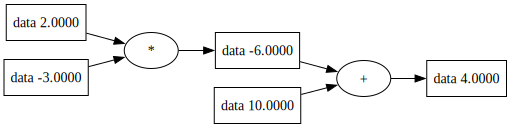

In [28]:
draw_dot(d)

### Добавляю label чтобы лучше видеть что есть что

In [29]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+',
                    label='{} + {}'.format(self.label, other.label))
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*',
                    label='{} * {}'.format(self.label, other.label))
        return out

In [30]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = Value(3.0, label='c')

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(3.0), Value: data=(6.0)}
+


In [31]:
print(a.label)
print(b.label)
print(c.label)
print(d.label)

a
b
c
a * b + c


Реализую чуть другие лейблы

In [32]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [33]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(10.0), Value: data=(-6.0)}
+


In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{%s | data %.4f  }"%(n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

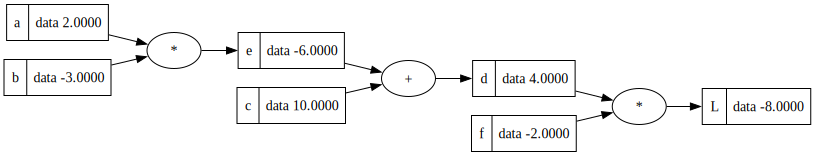

In [35]:
# Визуализация forward pass
draw_dot(L)

### Начигаю вычисление BackProp

Добавляю grad для хранения производных

In [36]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [37]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }"%(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [38]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(10.0), Value: data=(-6.0)}
+


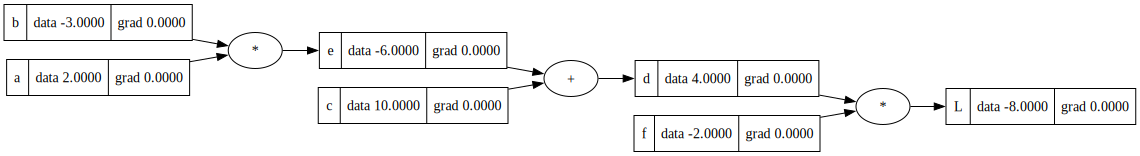

In [39]:
draw_dot(L)

Примитивный способ вычисления градиентов

In [40]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'

    L1 = L.data

    a = Value(2.0  + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data

    deriv = (L2 - L1) / h
    print(deriv)

In [41]:
lol()

6.000000000021544


L = d * f

dL / dd = f

dL / df = d

In [42]:
f.grad = 4.0
d.grad = -2.0
L.grad = 1.0

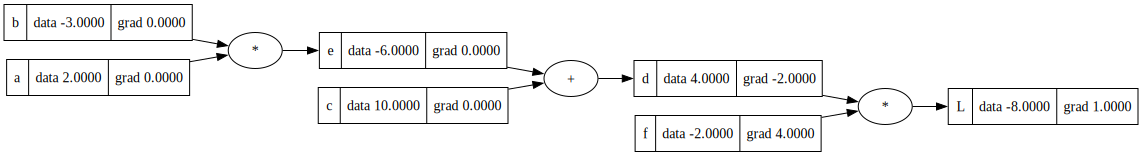

In [43]:
L.label = 'L'
draw_dot(L)

# Если понять градиент для этого узла, то поймешь backprop (обратное распространение ошибки через градиенты) для всех узлов и всех нейросетей

<b> The Chain Rule </b>

If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y.

As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."

https://en.wikipedia.org/wiki/Chain_rule

![Chain Rule Visualization](images/ChainRule.png)
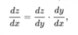
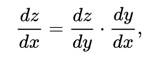

dL / dc = (dL / dd) * (dd / dc)

dL / da = (dL / dd) * (dd / de) * (de / da)

Вот таким вот образом ошибка распространяется назад на всю глубину нейросети

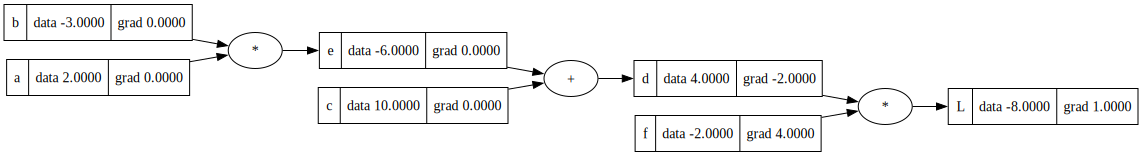

In [44]:
L.label = 'L'
draw_dot(L)

In [45]:
# Все можно вычислить проверить через функцию lol(), добавляя h к этим переменным, но у меня почему-то jupyter визуализация ломается от нее
c.grad = -2
e.grad = -2

In [46]:
b.grad = -4
a.grad = 6

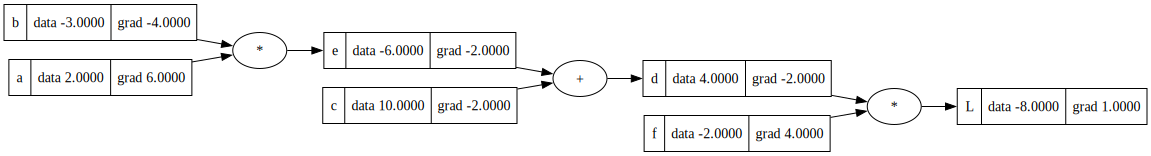

In [47]:
L.label = 'L'
draw_dot(L)

### Реализация оптимизации

In [48]:
lr = 0.001

a.data += lr * a.grad
b.data += lr * b.grad
c.data += lr * c.grad
# d.data += lr * d.grad
# e.data += lr * e.grad
f.data += lr * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.928064095999999


### На примере обновления весов нейрона

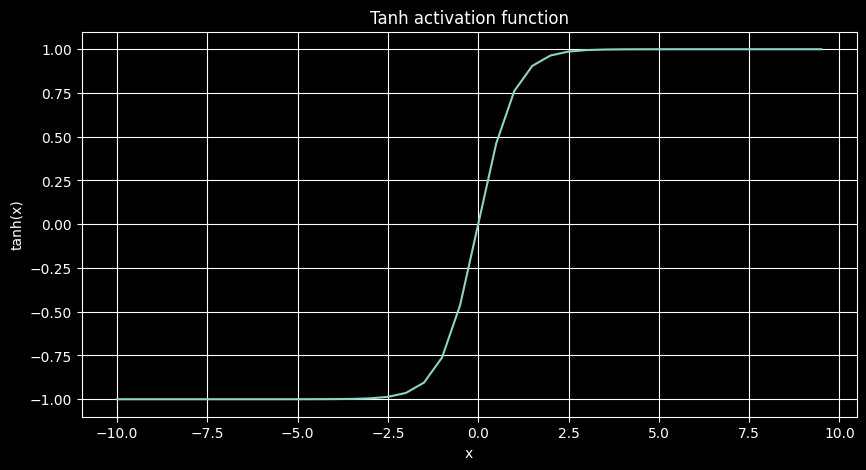

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(-10, 10, 0.5), np.tanh(np.arange(-10, 10, 0.5)))
plt.title('Tanh activation function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid()

In [50]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Веса нейрона
w1 = Value(10.0, label='w1')
w2 = Value(5.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

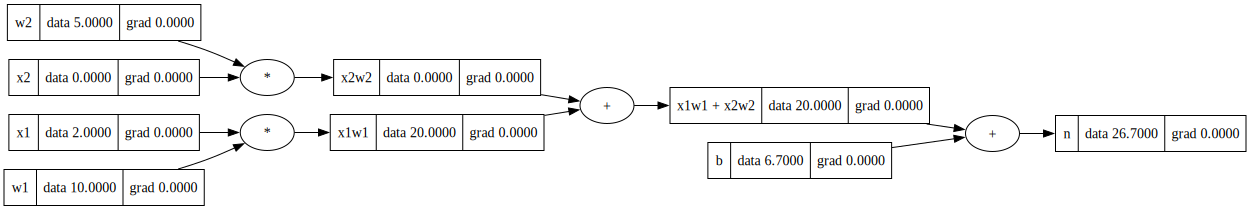

In [51]:
draw_dot(n)

In [52]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(data=t, _children=(self, ), label='tanh')
        return out


In [53]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()

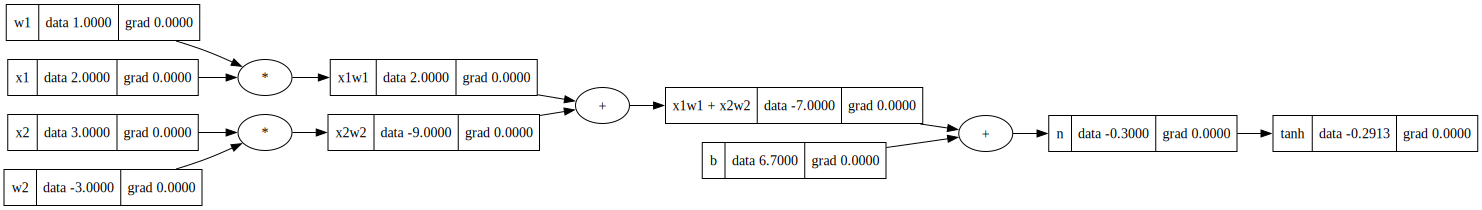

In [54]:
draw_dot(o)

In [55]:
o.grad = 1.0

In [56]:
# o = tanh(n)
# Производную для функции можно вывести / посмотреть в инете
# Производная для tanh
# do / dn = 1 - tanh(n)**2 = 1 - o**2

In [57]:
n.grad = 1 - o.data ** 2
n.grad

0.9151369618266293

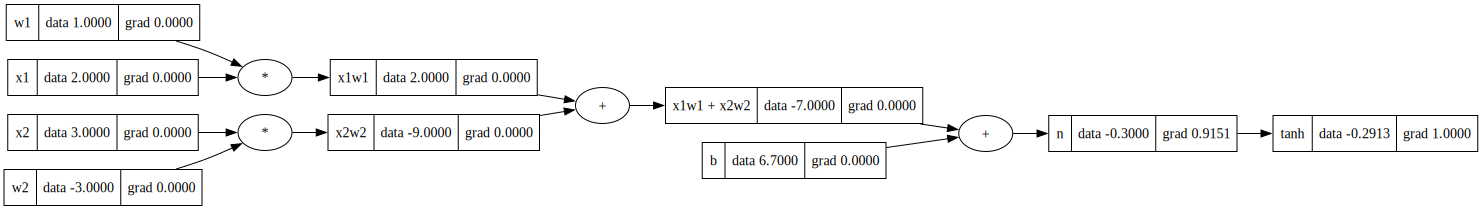

In [58]:
draw_dot(o)

In [59]:
# ТК след операция просто сложение, то градиент остается таким же как у предыдущего узла

x1w1x2w2.grad = n.grad
b.grad = n.grad

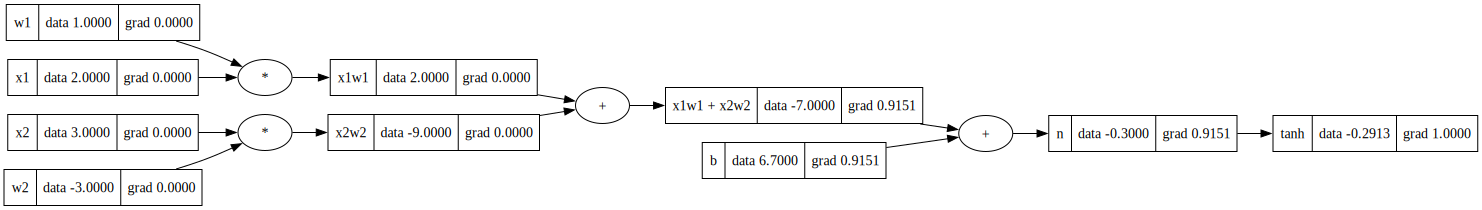

In [60]:
draw_dot(o)

In [61]:
# Опять операция сложения

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

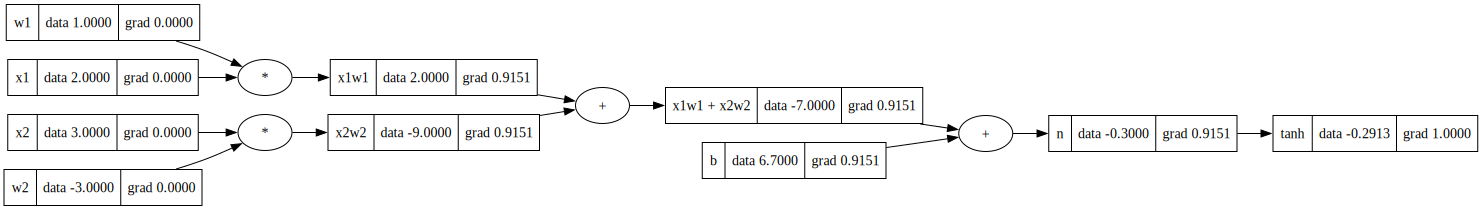

In [62]:
draw_dot(o)

In [63]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

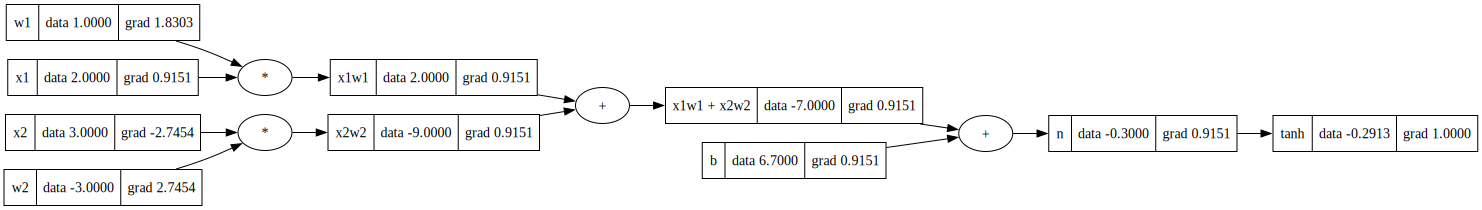

In [64]:
draw_dot(o)

#### Для того чтобы вычислить градиент в точке не надо знать далеко находящиеся градиенты, достаточно градиента след узла, и значений на этом узле. Градиенты далее идущего узла уже содержат информацию о влиянии на все последующие узлы

#### Прописываю механизм backprop для объекта Value

In [65]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(data=t, _children=(self, ), label='tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

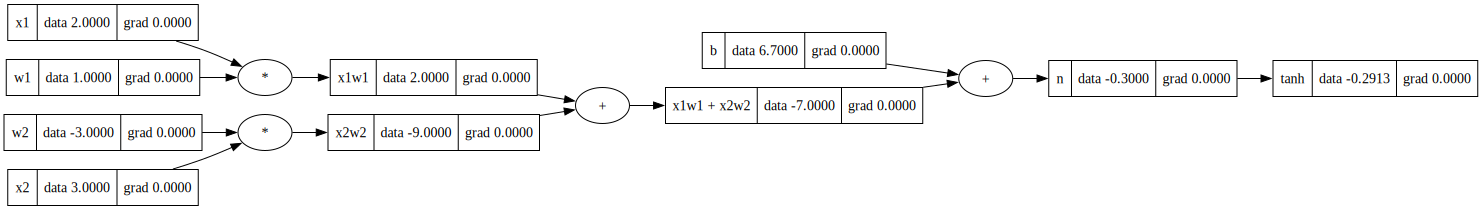

In [66]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

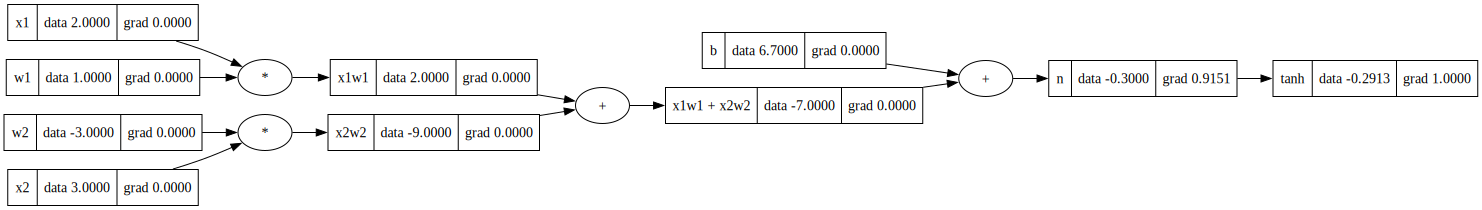

In [67]:
o.grad = 1.0
o._backward()
draw_dot(o)

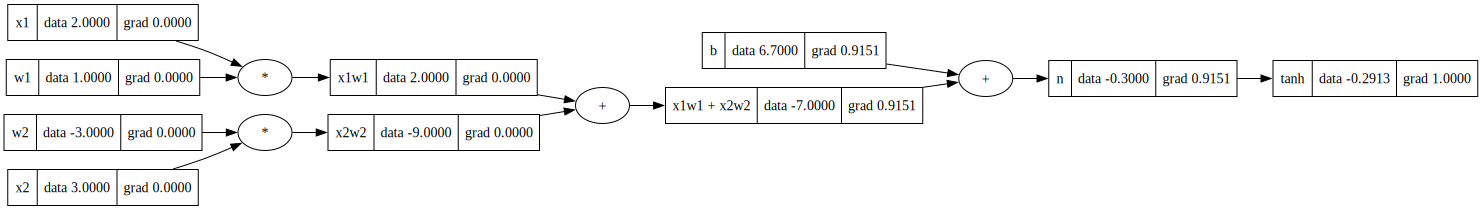

In [68]:
n._backward()
draw_dot(o)

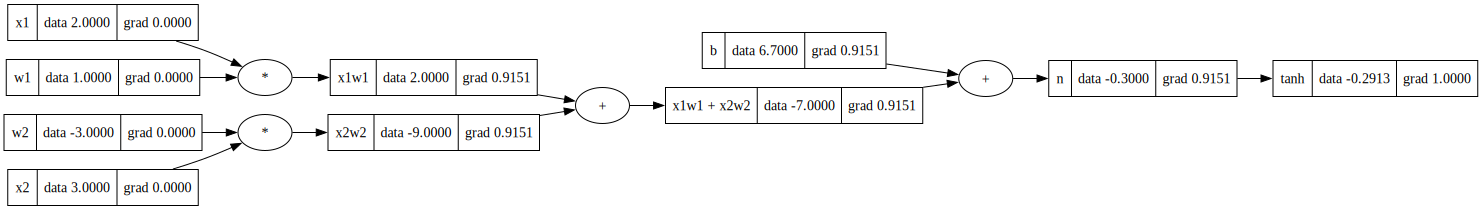

In [69]:
x1w1x2w2._backward()
draw_dot(o)

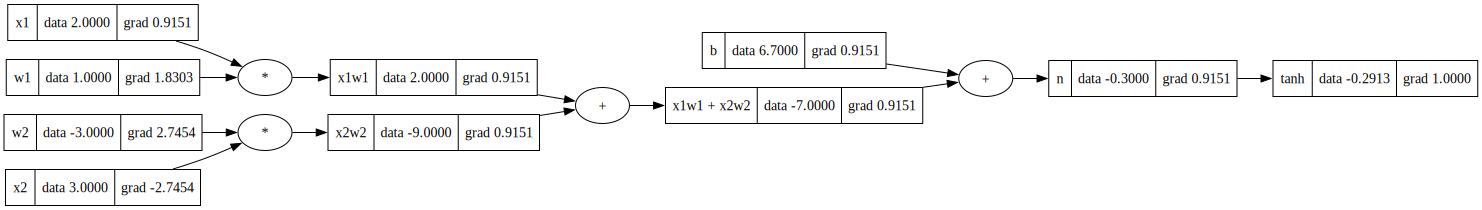

In [70]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

### Автоматизация вызова _backward

Topological sort - сортировка чтобы идти только справа налево

https://en.wikipedia.org/wiki/Topological_sorting

![TopologicalSortVisualization](images/top_sort.png)
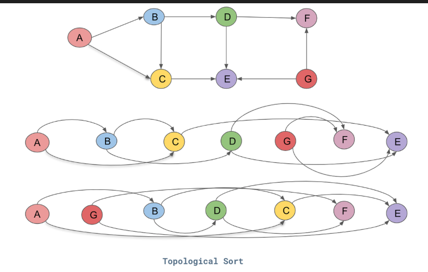

In [71]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        # Добавит тебя только после того как все твои chilren были занесены
        topo.append(v)
build_topo(o)
topo

[Value: data=(6.7),
 Value: data=(3.0),
 Value: data=(-3.0),
 Value: data=(-9.0),
 Value: data=(1.0),
 Value: data=(2.0),
 Value: data=(2.0),
 Value: data=(-7.0),
 Value: data=(-0.2999999999999998),
 Value: data=(-0.2913126124515908)]

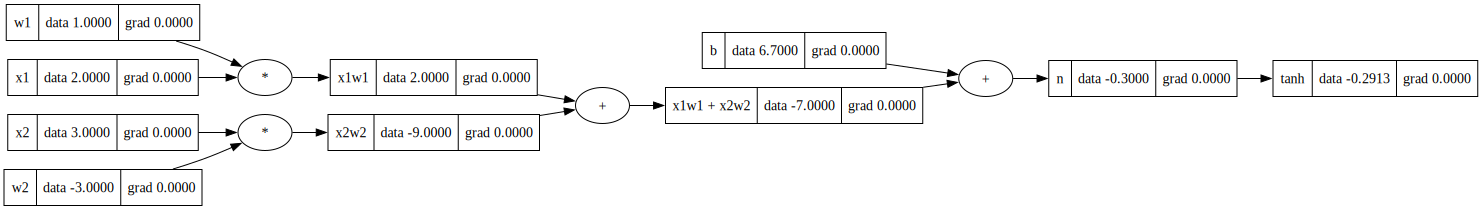

In [72]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

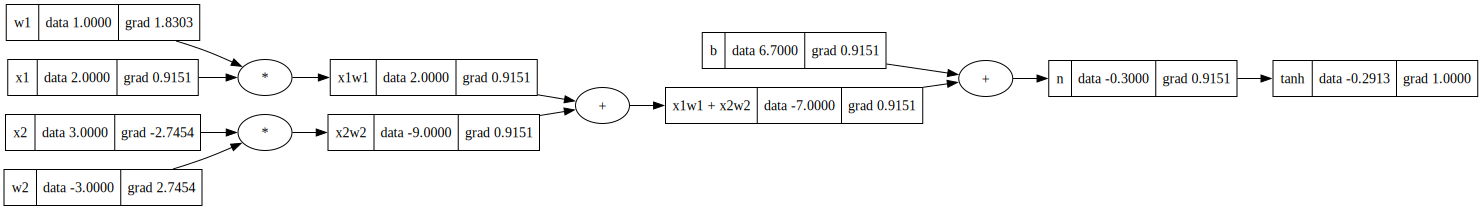

In [73]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        # Добавит тебя только после того как все твои chilren были занесены
        topo.append(v)
build_topo(o)

o.grad = 1.0
for node in reversed(topo):
    node._backward()

draw_dot(o)

### Переношу логику backward в Value

In [74]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad = (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

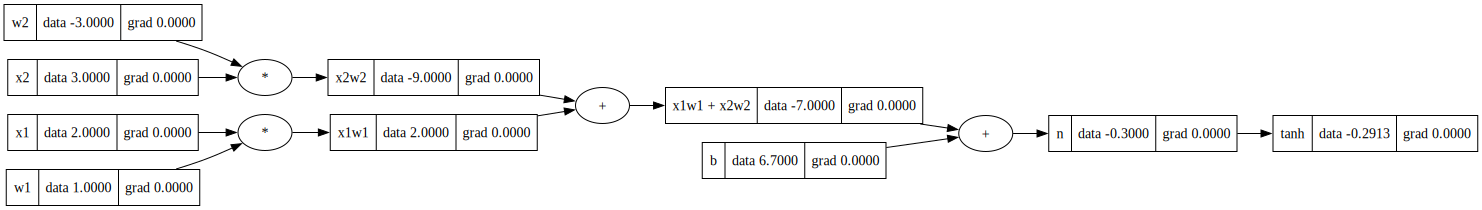

In [75]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

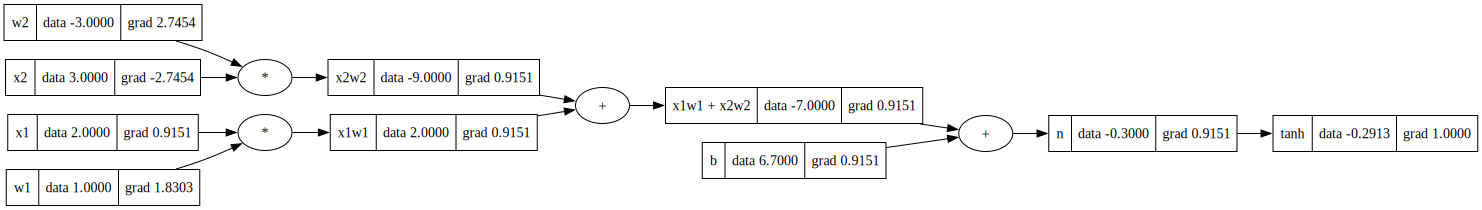

In [76]:
o.backward()
draw_dot(o)

### BugFix

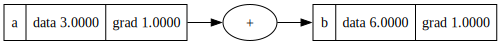

In [78]:
a = Value(3.0, label='a')
b = a + a
b.label = 'b'
b.backward()
draw_dot(b)

Градиент должен быть 2, у нас возникает ошибка при использовании одного Value более одного раза в выражении

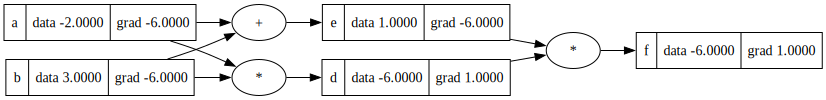

In [81]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a*b; d.label = 'd'
e = a+b; e.label = 'e'

f = e * d
f.label = 'f'
f.backward()
draw_dot(f)

Из за того что при записи градиентов стоит =, они перезатирают друг друга, а должны накапливаться (так же по chain rule), заменяем на +=

In [84]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

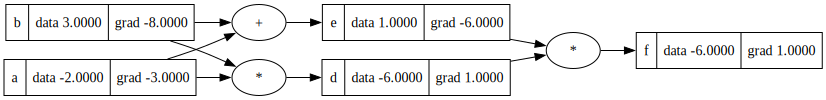

In [85]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a*b; d.label = 'd'
e = a+b; e.label = 'e'

f = e * d
f.label = 'f'
f.backward()
draw_dot(f)

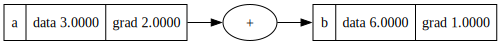

In [86]:
a = Value(3.0, label='a')
b = a + a
b.label = 'b'
b.backward()
draw_dot(b)

### Прокачиваю объект Value

In [88]:
a = Value(2.0, label='a')
a += 1

AttributeError: 'int' object has no attribute 'data'

In [93]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [94]:
a = Value(2.0, label='a')
a += 1
a.data

3.0

In [95]:
a = Value(2.0, label='a')
a *= 2
a.data

4.0

In [96]:
2 * a

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [100]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), _children=(self,), label='exp')
        def _backward():
            self.grad += math.exp(x) * out.grad # out.data = math.exp(x)
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [101]:
a = Value(2.0, label='a')

# Добавил __rmul__
2 * a

Value: data=(4.0)

In [103]:
# e в степени a.data
a.exp()

Value: data=(7.38905609893065)

In [104]:
a = Value(2.0, label='a')
b = Value(4.0, label='b')

a / b

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

In [106]:
# a / b
# a * (1 / b)
# a * b**-1

# Поэтому будет реализовано возведение в степень, а деление будет просто частным случаем при степени -1

In [175]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        # Сложение
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __neg__(self):
        # Чтобы нормально работало (-other)
        return self * -1.0

    def __sub__(self, other):
        # Вычитание
        return self + (-other)

    def __mul__(self, other):
        # Умножение
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __rmul__(self, other):
        # Умножение НА Value
        return self * other

    def __truediv__(self, other):
        # Деление
        return self * other**-1

    def __pow__(self, other):
        # Возведение в степень
        assert isinstance(other, (int, float))
        out = Value(self.data ** other, _children=(self,), _op='^')
        def _backward():
            self.grad += other * self.data ** (other - 1) * out.grad
        out._backward = _backward
        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), _children=(self,), label='exp')
        def _backward():
            self.grad += math.exp(x) * out.grad # out.data = math.exp(x)
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [176]:
a = Value(2.0, label='a')
b = Value(4.0, label='b')

a / b

Value: data=(0.5)

In [177]:
a - b

Value: data=(-2.0)

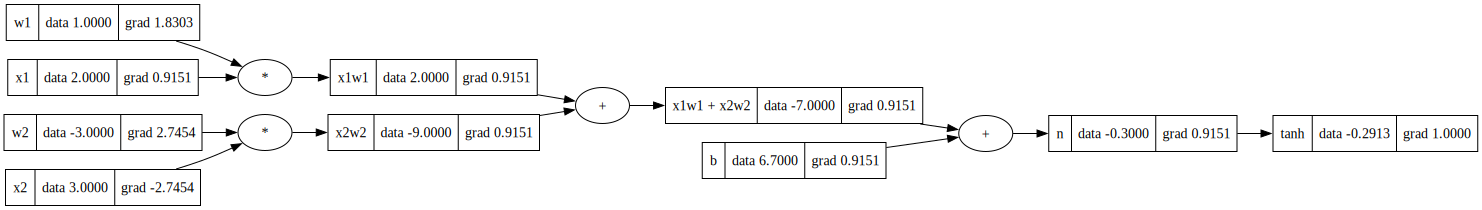

In [178]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.backward()
draw_dot(o)

Переписываю узел tanh на менее абстрактном уровне

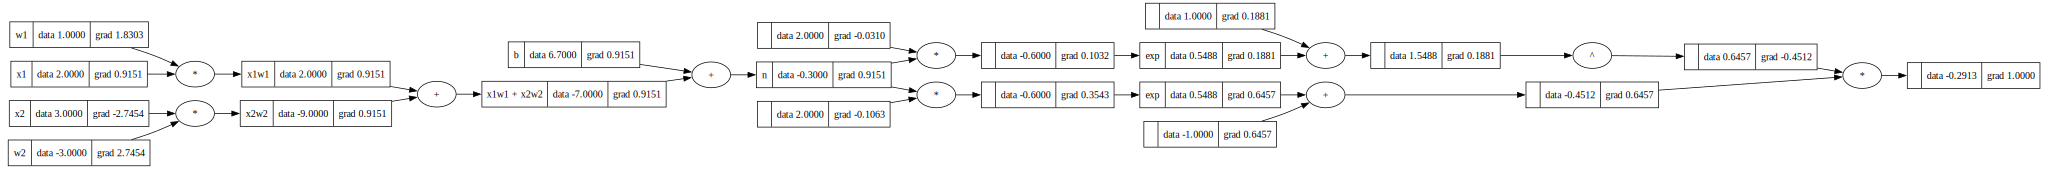

In [179]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

# ---
o = ((2 * n).exp() - 1) / ((2 * n).exp() + 1)

# ---
o.backward()
draw_dot(o)

### Для сравнения напишем на PyTorch

In [180]:
import torch

# Inputs
x1 = torch.Tensor([2]).double(); x1.requires_grad = True
x2 = torch.Tensor([3]).double(); x2.requires_grad = True

# Веса нейрона
w1 = torch.Tensor([1]).double(); w1.requires_grad = True
w2 = torch.Tensor([-3]).double(); w2.requires_grad = True

# Bias
b = torch.Tensor([6.7]).double(); b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

-0.2913127870001045
-----
x2 -2.745410580390695
w2 2.745410580390695
x1 0.9151368601302318
w1 1.8302737202604635


### Создаю MLP

In [181]:
class Neuron:
    def __init__(self, nin):
        """

        :param nin: кол-во инпутов
        """
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w @ x + b
        activ = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = activ.tanh()
        return out

class Layer:
    def __init__(self, nin, nout):
        '''

        :param nin: сколько параметров на вход каждого нейрона
        :param nout: сколько нейронов надо создать
        '''
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [182]:
x = [2.0, 3.0]
n = Neuron(2)
# __ call__
n(x)

Value: data=(-0.9991951934439464)

In [183]:
x = [2.0, 3.0]
l = Layer(2, 3)
# __ call__
l(x)

[Value: data=(-0.0026868066592545723),
 Value: data=(-0.979527685031707),
 Value: data=(-0.13377786315408396)]

![MLP_schema](images/MLP_Schema.png)

In [184]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value: data=(-0.3846784495751067)

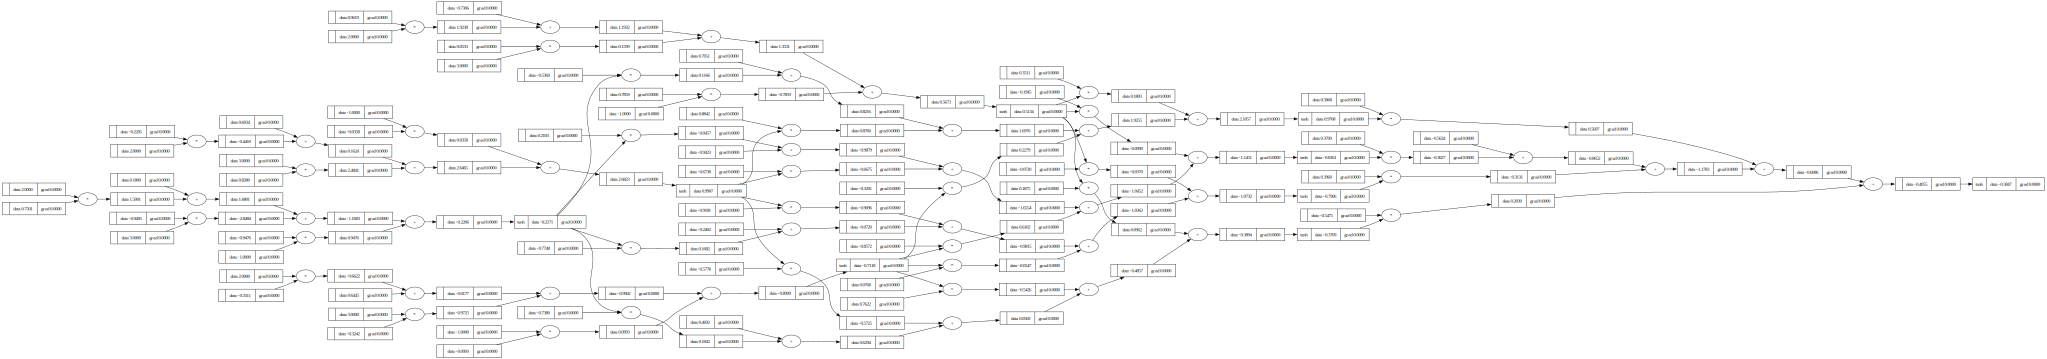

In [185]:
draw_dot(n(x))

### Примеры на example dataset

In [204]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        # Сложение
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __neg__(self):
        # Чтобы нормально работало (-other)
        return self * -1.0

    def __sub__(self, other):
        # Вычитание
        return self + (-other)

    def __mul__(self, other):
        # Умножение
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def __truediv__(self, other):
        # Деление
        return self * other**-1

    def __pow__(self, other):
        # Возведение в степень
        assert isinstance(other, (int, float))
        out = Value(self.data ** other, _children=(self,), _op='^')
        def _backward():
            self.grad += other * self.data ** (other - 1) * out.grad
        out._backward = _backward
        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), _children=(self,), label='exp')
        def _backward():
            self.grad += math.exp(x) * out.grad # out.data = math.exp(x)
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [205]:
xs = [
    [2.0, 3.0, 1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]

In [206]:
ypred

[Value: data=(-0.5343181918880429),
 Value: data=(-0.785525410580752),
 Value: data=(-0.6870413620579775),
 Value: data=(-0.5005417714835152)]

In [207]:
loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
loss

Value: data=(4.74970038049456)

In [210]:
# Вычисленный loss так же оказался value, поэтому начиная с него можно вызвать обратное распространение ошибки
type(loss)

__main__.Value

In [209]:
loss.backward()

In [213]:
n.layers[0].neurons[0].w[0]

Value: data=(0.7500646783462308)

In [214]:
n.layers[0].neurons[0].w[0].grad

-0.1508807225357935

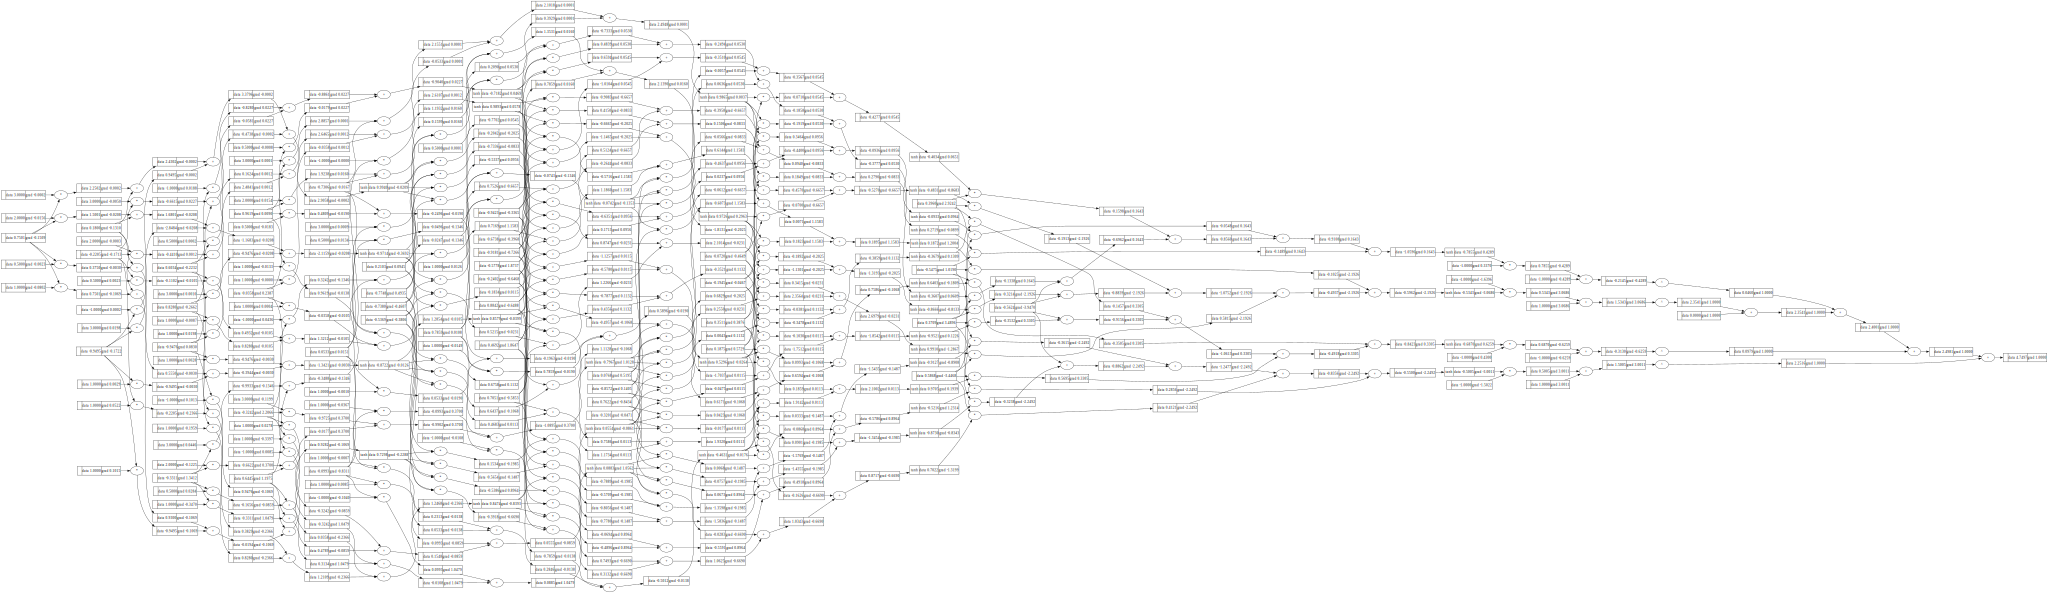

In [215]:
draw_dot(loss)

### Доделываю MLP чтобы реализовать обратное распространение ошибки

In [220]:
class Neuron:
    def __init__(self, nin):
        """

        :param nin: кол-во инпутов
        """
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w @ x + b
        activ = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = activ.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        '''

        :param nin: сколько параметров на вход каждого нейрона
        :param nout: сколько нейронов надо создать
        '''
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        # Альтернативный вариант через list_comprehension
        # params = [p for neuron in self.neurons for p in neuron.parameters()]
        params = []
        for n in self.neurons:
            params.extend(n.parameters())
        return params

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        params = []
        for layer in self.layers:
            params.extend(layer.parameters())
        return params

In [221]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])

In [223]:
len(n.parameters())

41

In [224]:
xs = [
    [2.0, 3.0, 1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]

In [225]:
loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
loss

Value: data=(6.2773635705554796)

In [226]:
loss.backward()

In [227]:
print(n.layers[0].neurons[0].w[0].data)
print(n.layers[0].neurons[0].w[0].grad)

0.5785367505689842
2.041265930174917


In [228]:
lr = 0.01

for p in n.parameters():
    p.data += -lr * p.grad

In [229]:
print(n.layers[0].neurons[0].w[0].data)
print(n.layers[0].neurons[0].w[0].grad)

0.5581240912672351
2.041265930174917


In [231]:
ypred = [n(x) for x in xs]
loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
print(loss)
loss.backward()

lr = 0.01

for p in n.parameters():
    p.data += -lr * p.grad

Value: data=(5.71087885748683)


In [232]:
ypred = [n(x) for x in xs]
loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
print(loss)
loss.backward()

lr = 0.01

for p in n.parameters():
    p.data += -lr * p.grad

Value: data=(4.482856884877423)


In [233]:
ypred = [n(x) for x in xs]
loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
print(loss)
loss.backward()

lr = 0.01

for p in n.parameters():
    p.data += -lr * p.grad

Value: data=(3.34613385067488)


In [234]:
ys

[1.0, -1.0, -1.0, 1.0]

In [235]:
ypred

[Value: data=(-0.5698573336333478),
 Value: data=(-0.8107708297831063),
 Value: data=(-0.28683000765830907),
 Value: data=(0.4192567814646012)]

In [236]:
for _ in range(100):
    ypred = [n(x) for x in xs]
    loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))
    print(loss)
    loss.backward()

    lr = 0.01

    for p in n.parameters():
        p.data += -lr * p.grad

Value: data=(3.1358335025812396)
Value: data=(3.5432093576396717)
Value: data=(3.371322822985115)
Value: data=(2.9105485433171823)
Value: data=(2.5465866853750394)
Value: data=(2.274507900194019)
Value: data=(2.1281033030634466)
Value: data=(2.0914974537152315)
Value: data=(2.0992934773656673)
Value: data=(2.0997004683488503)
Value: data=(2.0753448073617764)
Value: data=(2.036406200236865)
Value: data=(2.007523983298729)
Value: data=(2.008961239903966)
Value: data=(2.039228437399389)
Value: data=(2.0760372864710757)
Value: data=(2.0940756451677016)
Value: data=(2.0808969424618855)
Value: data=(2.042441720192806)
Value: data=(1.9999314432022886)
Value: data=(1.9780117316404595)
Value: data=(1.9873689161803636)
Value: data=(2.0163438585373963)
Value: data=(2.040531677174868)
Value: data=(2.038916572475788)
Value: data=(2.0035623128402427)
Value: data=(1.94224481815294)
Value: data=(1.8755629683337076)
Value: data=(1.8251637519636363)
Value: data=(1.7953694301326966)
Value: data=(1.765206

In [237]:
ypred

[Value: data=(0.9999992865418101),
 Value: data=(-0.9999999884393564),
 Value: data=(-0.9999999999999768),
 Value: data=(0.9999999999376482)]

Еще раз соберу в чистовом виде

In [240]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])

In [241]:
xs = [
    [2.0, 3.0, 1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]

In [242]:
for k in range(20):
    # Forward pass
    ypred = [n(x) for x in xs]
    loss = sum((y - yhat)**2  for y, yhat in zip(ys, ypred))



    # Backward pass
    # До этого был баг, градиенты копились, надо не забывать их обнулять.
    # Копиться они должны внутри текущего расчета, а не передаваться из расчета в расчет
    for p in n.parameters():
        p.grad = 0
    loss.backward()

    # Updating
    lr = 0.01
    for p in n.parameters():
        p.data += -lr * p.grad
    print(f'Step: {k} Loss: {loss.data:.4f}')

Step: 0 Loss: 3.3606
Step: 1 Loss: 2.8170
Step: 2 Loss: 2.3191
Step: 3 Loss: 1.9099
Step: 4 Loss: 1.5988
Step: 5 Loss: 1.3606
Step: 6 Loss: 1.1687
Step: 7 Loss: 1.0082
Step: 8 Loss: 0.8727
Step: 9 Loss: 0.7587
Step: 10 Loss: 0.6635
Step: 11 Loss: 0.5843
Step: 12 Loss: 0.5185
Step: 13 Loss: 0.4635
Step: 14 Loss: 0.4174
Step: 15 Loss: 0.3784
Step: 16 Loss: 0.3451
Step: 17 Loss: 0.3166
Step: 18 Loss: 0.2920
Step: 19 Loss: 0.2705


### Попробовать решить какую-нибудь +- ощутимую задачку сеткой построенной из этого